In [5]:
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import itertools as it
import statsmodels.api as sm


In [6]:
df = pd.read_excel("./data_set/nts_naver_trends.xlsx", header = 6)

In [7]:
df.head()

,날짜,국세청
0,2016-01-01,100.00000
1,2016-02-01,23.14133
2,2016-03-01,13.91950
3,2016-04-01,11.41206
4,2016-05-01,26.82556


In [8]:
# Tune Seasonal ARIMA model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(it.product(p, d, q))
print(pdq)

# Generate all different combinations of seasonal p, q and q triplets
# Seasonality is one month (12*5 = months)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(it.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
searching_data = df.국세청.values

In [10]:
result_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(searching_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, round(results.aic,2)))
            result_list.extend([param, param_seasonal, round(results.aic,2)])
        except:
            print('error')
            continue
            
print('Done!')

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:436.59
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:302.63
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:200.23
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1261.33
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:210.19
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:176.85
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:132.76
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:997.19
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:416.5
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:286.05
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:194.55
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:839.62
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:207.22
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:167.5
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:132.03
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:845.98
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:415.49
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:278.39
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:205.79
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:205.67
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:183.17
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC

106.97
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2854      0.099      2.890      0.004       0.092       0.479
ar.S.L12      -0.0924      0.129     -0.715      0.474      -0.346       0.161
sigma2         3.3230      0.791      4.200      0.000       1.772       4.874


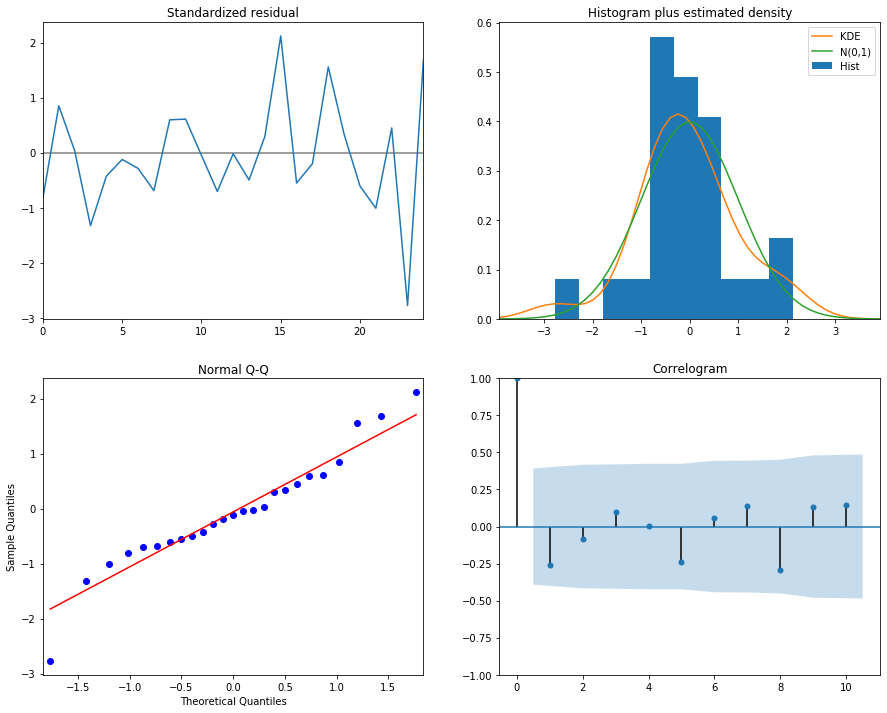

In [11]:
# train Seasonal ARIMA model
mod = sm.tsa.statespace.SARIMAX(searching_data,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

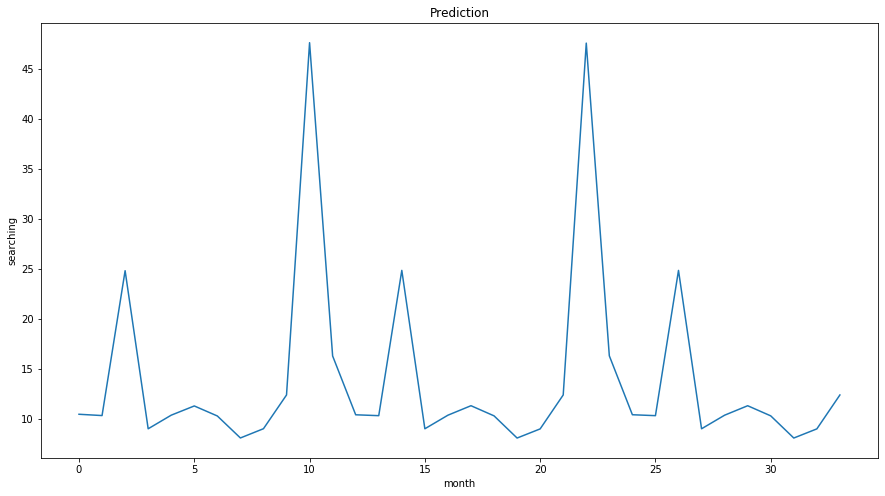

In [12]:
pred_uc = results.get_forecast(steps=34)

plt.rcParams['figure.figsize'] = [15, 8]

plt.plot(pred_uc.predicted_mean)
#plt.plot(df.국세청.values[-12:], color='red') # compare with previous week
plt.xlabel('month')
plt.ylabel('searching')
plt.title('Prediction')
plt.show()

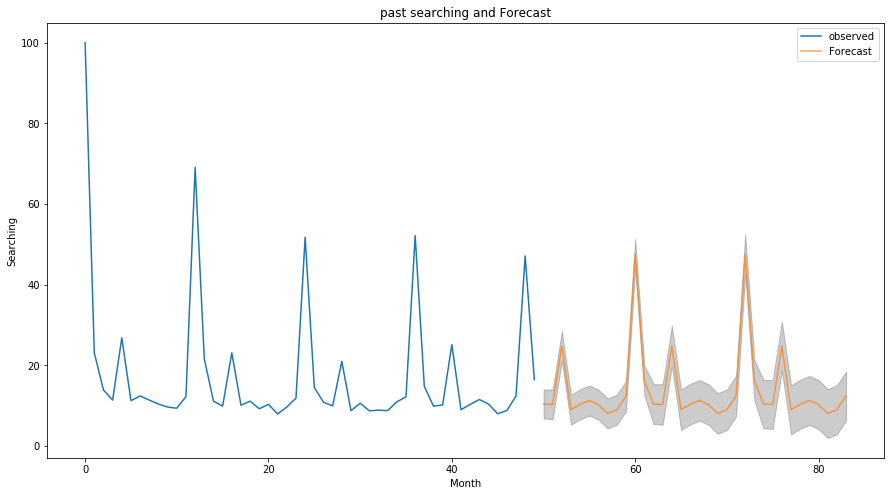

In [13]:
# plot LAST_N_SAMPLES and prediction
LAST_N_SAMPLES = 50

pred_ci = pred_uc.conf_int()

X_obs = range(0, 50)
X_pred = range(50, 84)

plt.plot(X_obs[-LAST_N_SAMPLES:], searching_data[-LAST_N_SAMPLES:], label='observed')
plt.plot(X_pred[:34], pred_uc.predicted_mean[:34], label='Forecast', alpha=.7)

plt.fill_between(X_pred,
                pred_ci[:, 0],
                pred_ci[:, 1], color='k', alpha=.2)

plt.xlabel('Month')
plt.ylabel('Searching')
plt.title('past searching and Forecast')
plt.legend()
plt.show()

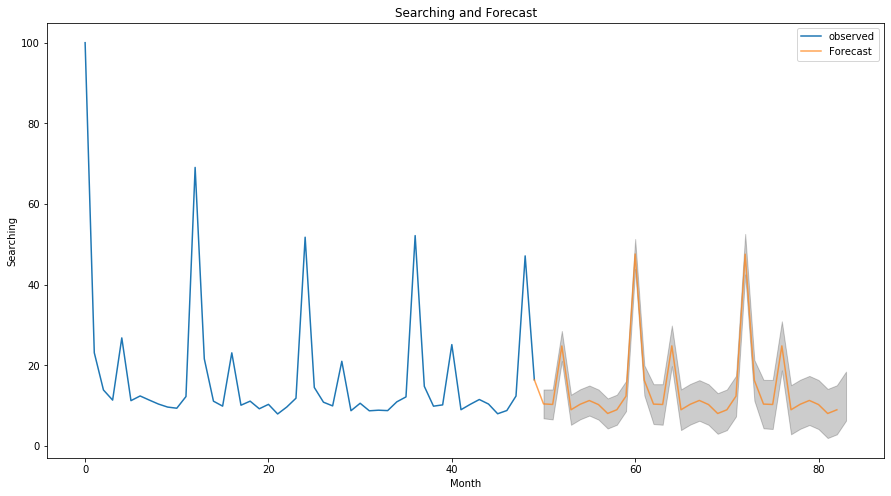

In [14]:
# add last observed value as first predicted one to avoid gap in graph

X_pred = range(49, 84) # predicted range will start one sample before

pred_uc.predicted_mean = np.insert(pred_uc.predicted_mean, 0, searching_data[-1], axis=0) # we insert the value

plt.plot(X_obs[-LAST_N_SAMPLES:], searching_data[-LAST_N_SAMPLES:], label='observed')
plt.plot(X_pred[:34], pred_uc.predicted_mean[:34], label='Forecast', alpha=.7)
#plt.plot(X_pred, pred_uc.predicted_mean, label='Forecast', alpha=.7)

plt.fill_between(X_pred[1:], # now we fill confidence interval starting at sample index 1
                pred_ci[:, 0],
                pred_ci[:, 1], color='k', alpha=.2)

plt.xlabel('Month')
plt.ylabel('Searching')
plt.title('Searching and Forecast')
plt.legend()
plt.show()